In [1]:
import pandas as pd

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_data_train = pd.read_csv('messages_train_ready_for_WS.tsv', sep="\t")
goldstandard = pd.read_csv('goldstandard_dev_2022.tsv', sep="\t", names=[str(i) for i in range(12)])

x_val = pd.read_csv('messages_dev_features_ready_for_WS_2022.tsv', sep="\t")
y_val = goldstandard['2']  # only emotion label column
y_val = y_val.rename('emotion', axis='columns')
x_val['emotion'] = y_val

train = all_data_train[x_val.columns] # leave columns related to this track
train['emotion'] = all_data_train['emotion'] # only emotion label column




/Users/Jeka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [3]:
def clean(text):
    #lowercase the text
    text = text.lower()
    
    #remove punctuations
    text = "".join([w for w in text if not w in string.punctuation])
    
    #split the text
    text = text.split()
    
    #remove stopwords
    text = " ".join([word for word in text if not word in stop_words])
    
    #remove clean text data
    return text

## Train data:

### Parameters

In [4]:
train['essay'] = train['essay'].apply(clean)

/Users/Jeka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
train.head()

,message_id,response_id,article_id,essay,gender,education,race,age,income,emotion
0,R_1hGrPtWM4SumG0U_1,R_1hGrPtWM4SumG0U,67,really diheartening read immigrants article dr...,1,4,1,33,50000,sadness
1,R_1hGrPtWM4SumG0U_2,R_1hGrPtWM4SumG0U,86,phone lines suicide prevention line surged ele...,1,4,1,33,50000,sadness
2,R_1hGrPtWM4SumG0U_3,R_1hGrPtWM4SumG0U,206,matter heritage able serve country thai herita...,1,4,1,33,50000,neutral
3,R_1hGrPtWM4SumG0U_4,R_1hGrPtWM4SumG0U,290,frightening learn shark attacks surfers aware ...,1,4,1,33,50000,fear
4,R_1hGrPtWM4SumG0U_5,R_1hGrPtWM4SumG0U,342,eldest generation russians arent treated prope...,1,4,1,33,50000,sadness


In [6]:
emotions = ['neutral', 'sadness', 'anger', 'fear', 'surprise', 'disgust', 'joy']

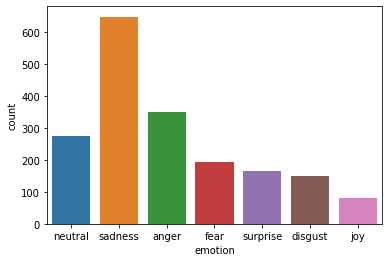

In [7]:
sns.countplot(train['emotion'], order=emotions) #emotion distribution in train dataset

In [8]:
train.response_id.value_counts() #5 reaction texts from 372 authors

R_2xQNrTepBG1c9Vc    5
R_0OePPQQ0Eu8vF3X    5
R_2xJcBbmJq6tC50y    5
R_2meG1rpRzuXw8tb    5
R_5BjrkiX7wiiuXFn    5
                    ..
R_2rSDCgMnHjVtsRu    5
R_272LHt5PRLHFyfn    5
R_1C9o9rzcu8JVCn9    5
R_3fPgKb8r8QTHYUz    5
R_sLqHaHugH6UNWmJ    5
Name: response_id, Length: 372, dtype: int64

In [9]:
train.article_id.value_counts() # 417 news articles, 1 to 7 reaction on each of them

39     7
5      7
49     7
50     7
54     7
      ..
75     2
194    2
129    2
61     2
43     1
Name: article_id, Length: 417, dtype: int64

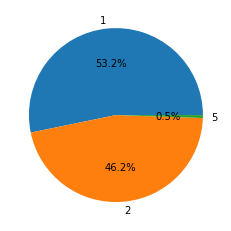

In [10]:
plt.pie(train.gender.value_counts(), labels=train.gender.value_counts().index, autopct='%1.1f%%')
plt.show() #distribution of authors by gender

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfe920d588>]],
      dtype=object)

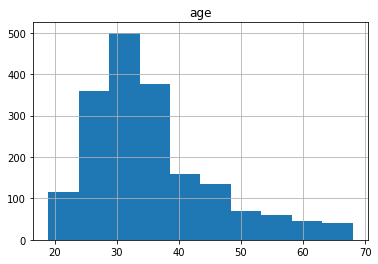

In [11]:
train.hist(column='age') #distribytion of authors by age

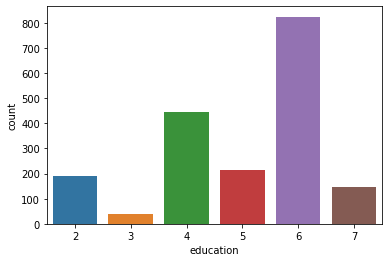

In [12]:
sns.countplot(train['education']) #distribytion of authors by education level

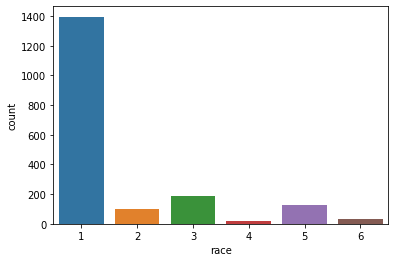

In [13]:
sns.countplot(train['race']) #distribytion of authors by race

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfe94f8ac8>]],
      dtype=object)

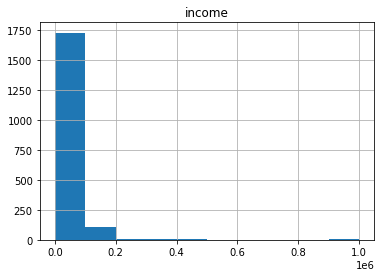

In [14]:
train.hist(column='income') #distribytion of authors by income

### Text EDA

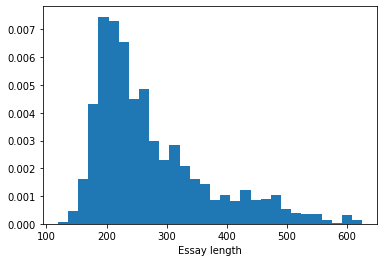

In [15]:
plt.hist([len(i) for i in train.essay], density=True, bins=30)  # essay length from 300 to 800 symbols
plt.xlabel('Essay length');

In [16]:
from wordcloud import WordCloud


In [17]:
def create_wordcloud(emotions, data):
    for emotion in emotions:
        text = data[data['emotion']==emotion].essay
        text = str(text)
        
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
        
        plt.title(f'WordCloud of emotion {emotion}', fontsize=20)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

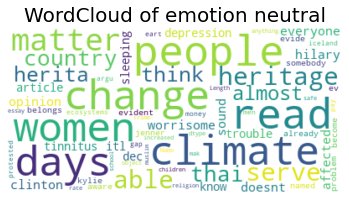

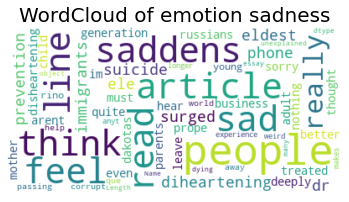

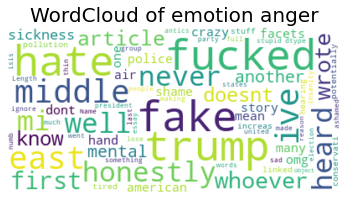

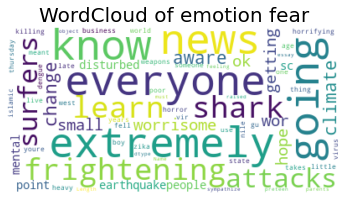

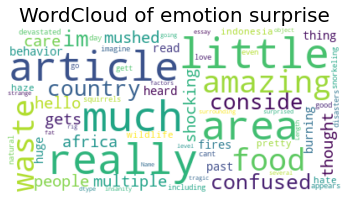

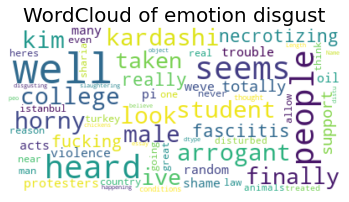

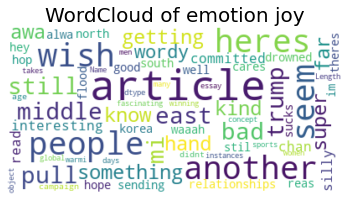

In [18]:
create_wordcloud(emotions, train) 
# pretty representative for sadness, anger, fear; not quiet so for surprise; pretty confusing for disgust and joy

## Val data

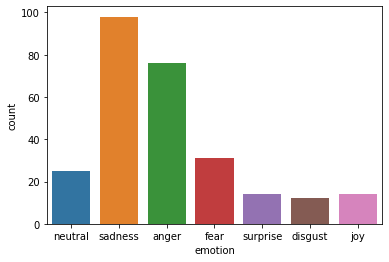

In [19]:
sns.countplot(y_val, order=emotions) #emotion distribution in val dataset

In [20]:
x_val['essay'] = x_val['essay'].apply(clean)

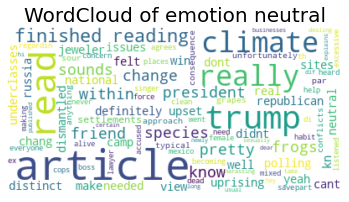

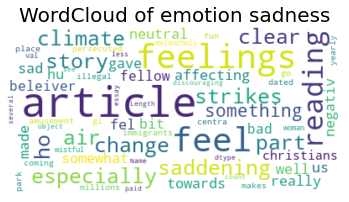

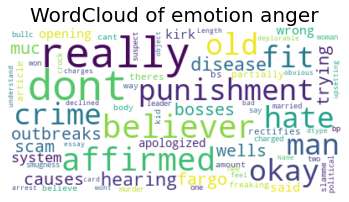

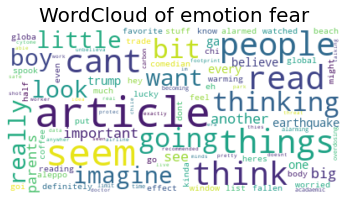

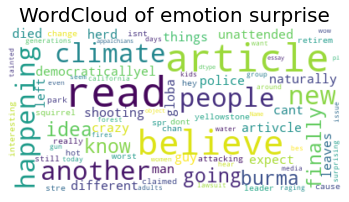

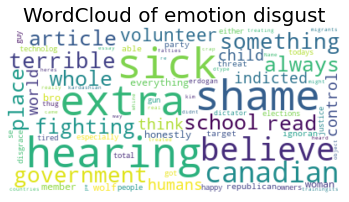

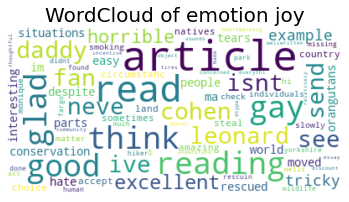

In [21]:
create_wordcloud(emotions, x_val) #not clear here
